In [29]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Loading the data
data=pd.read_csv("austin_weather.csv")
data

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [4]:
# droping the unnecessary columns
data=data.drop(['Events','Date',"SeaLevelPressureLowInches"],axis=1)

In [5]:
# Cleaning the data
data=data.replace('T',0.0)

In [6]:
data

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,10,10,10,13,4,20,0


In [7]:
data=data.replace('-',0.0)
data

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,10,10,10,13,4,20,0


In [8]:
data.to_csv('austin_weather_final.csv')

In [9]:
data=pd.read_csv('austin_weather_final.csv')
data

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1314,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,10.0,10.0,10.0,12.0,5.0,21.0,0.00
1315,1315,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,10.0,10.0,10.0,14.0,5.0,20.0,0.00
1316,1316,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,10.0,10.0,10.0,12.0,4.0,17.0,0.00
1317,1317,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,10.0,10.0,10.0,13.0,4.0,20.0,0.00


In [10]:
# Dropping the precipitationSUm inches colums
X=data.drop(['PrecipitationSumInches'],axis=1)

In [11]:
Y=data['PrecipitationSumInches']

In [12]:
# reshaping it into 2d vector
Y=Y.values.reshape(-1,1)

In [13]:
day_index=789
days=[i for i in range(Y.size)]

In [14]:
# initialise the linear regression classifier
clf=LinearRegression()
# Train the classifier
clf.fit(X,Y)

LinearRegression()

In [16]:
data.columns

Index(['Unnamed: 0', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches'],
      dtype='object')

The precipitation trend graph:


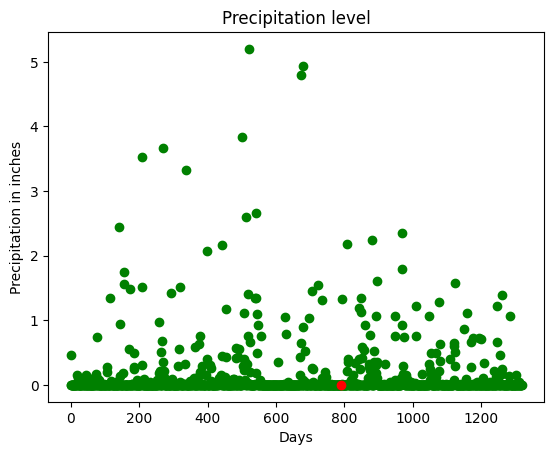

In [18]:
# Plot a graph 
print("The precipitation trend graph:")
plt.scatter(days,Y,color='g')
plt.scatter(days[day_index],Y[day_index],color='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
plt.show()
x_vis=X.filter(['TempAvgF','DewPointHighF','HumidityAvgPercent','SeaLevelPressureAvgInches','VisibilityAvgMiles','WindAvgMPH'])

The precipitation  vs attributes trend graph:


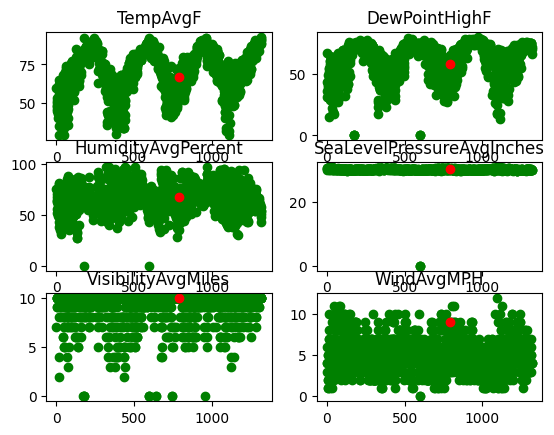

In [21]:
print("The precipitation  vs attributes trend graph:")
for i in range(x_vis.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days,x_vis[x_vis.columns.values[i][:100]],color='g')
    plt.scatter(days[day_index],x_vis[x_vis.columns.values[i]][day_index],color='r')
    plt.title(x_vis.columns.values[i])
plt.show()

C:\Users\sacbook\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


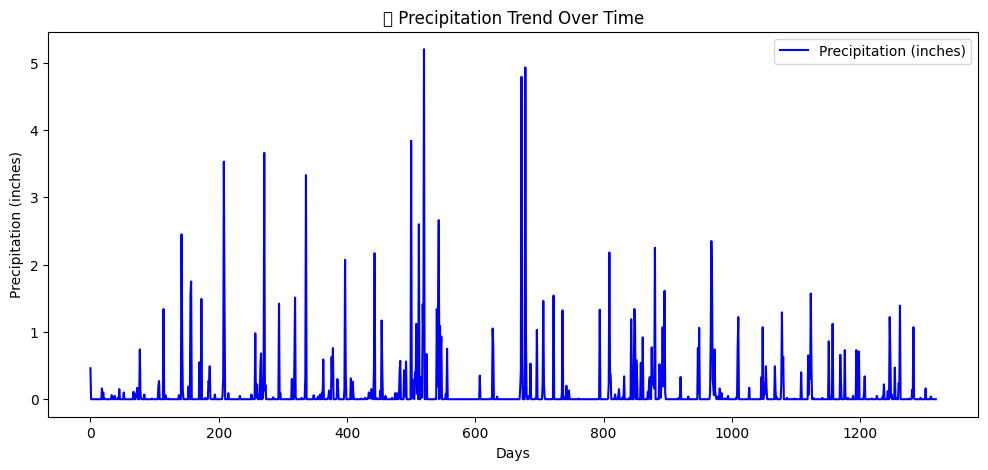

In [24]:
# Plot precipitation trend over time
plt.figure(figsize=(12,5))
plt.plot(data.index, data['PrecipitationSumInches'], color='b', label='Precipitation (inches)')
plt.title("🌧️ Precipitation Trend Over Time")
plt.xlabel("Days")
plt.ylabel("Precipitation (inches)")
plt.legend()
plt.show()



In [25]:
import seaborn as sns


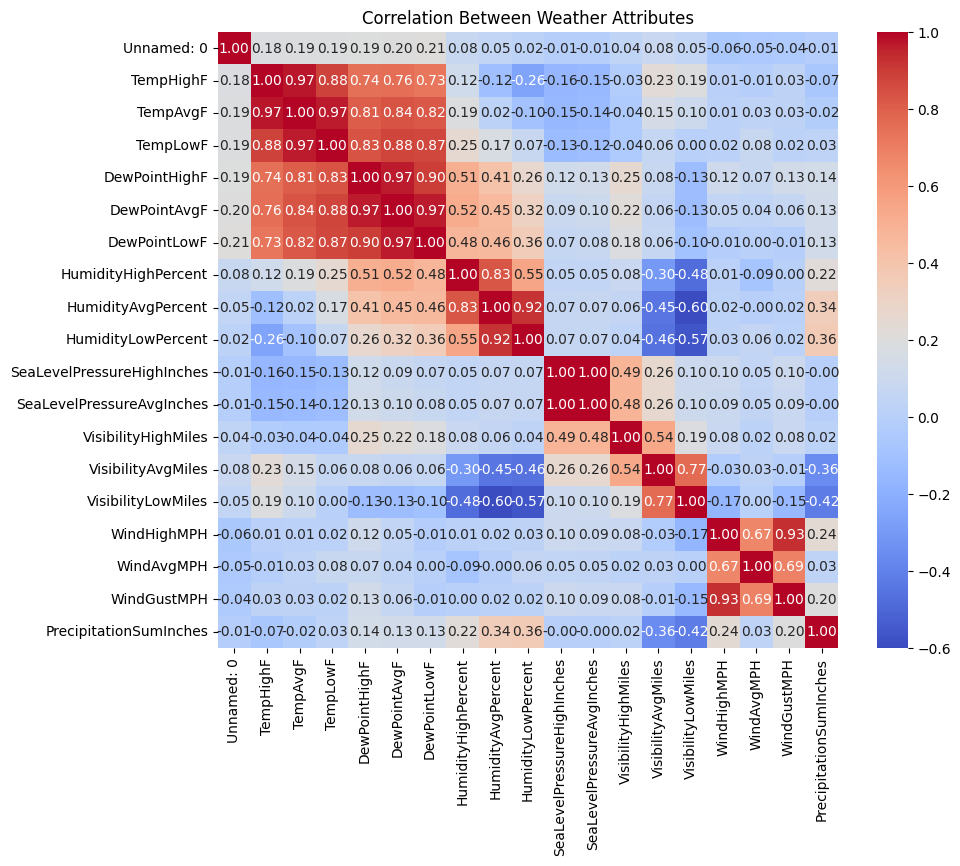

In [27]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Weather Attributes")
plt.show()

In [28]:
# Selecting key weather attributes that may influence precipitation
features = ['TempAvgF', 'HumidityHighPercent', 'WindAvgMPH']
target = 'PrecipitationSumInches'

X = data[features]
y = data[target]

In [30]:
# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 1055, Testing samples: 264


In [32]:
# Apply Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nLinear Regression model trained successfully!")



Linear Regression model trained successfully!


In [34]:
# Model Evaluation
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


 Model Performance:
Mean Absolute Error (MAE): 0.1801
Mean Squared Error (MSE): 0.1147
Root Mean Squared Error (RMSE): 0.3387
R² Score: 0.0332


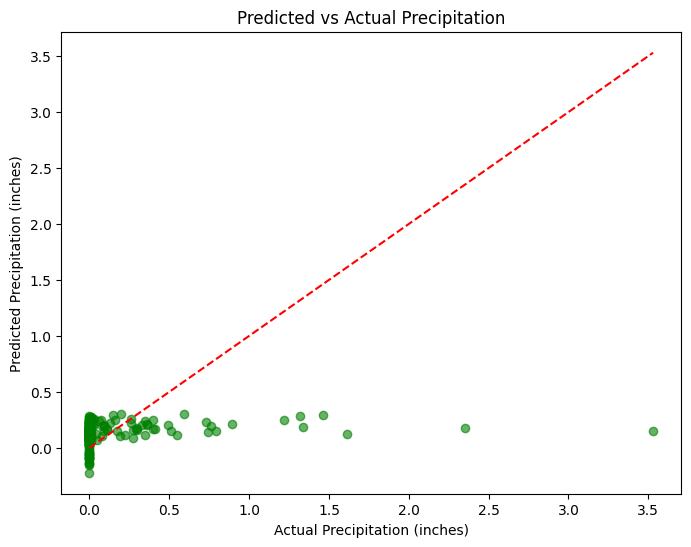

In [35]:
#Visualizing Predictions vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.title("Predicted vs Actual Precipitation")
plt.xlabel("Actual Precipitation (inches)")
plt.ylabel("Predicted Precipitation (inches)")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.show()


 Feature Coefficients:
               Feature  Coefficient
0             TempAvgF    -0.002496
1  HumidityHighPercent     0.008896
2           WindAvgMPH     0.015025


C:\Users\sacbook\AppData\Local\Temp\ipykernel_10092\1474045034.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


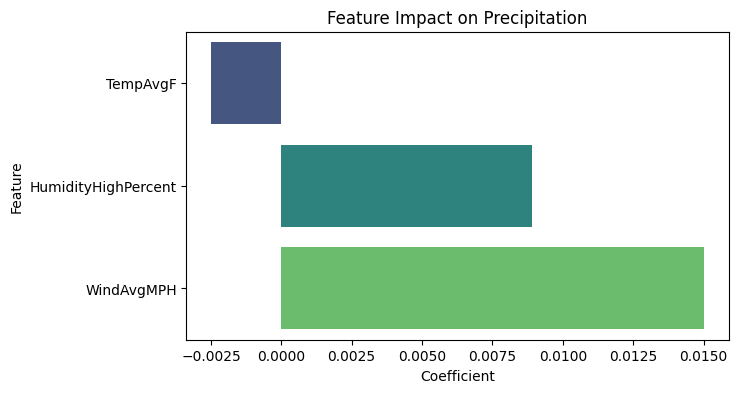

In [37]:
# Feature Importance Analysis
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("\n Feature Coefficients:")
print(coefficients)

plt.figure(figsize=(7,4))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title("Feature Impact on Precipitation")
plt.show()
